<a href="https://colab.research.google.com/github/nicoavilan/Visualizacion-de-datos/blob/main/Voronoi_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método KMeans y Diagramas de Voronoi

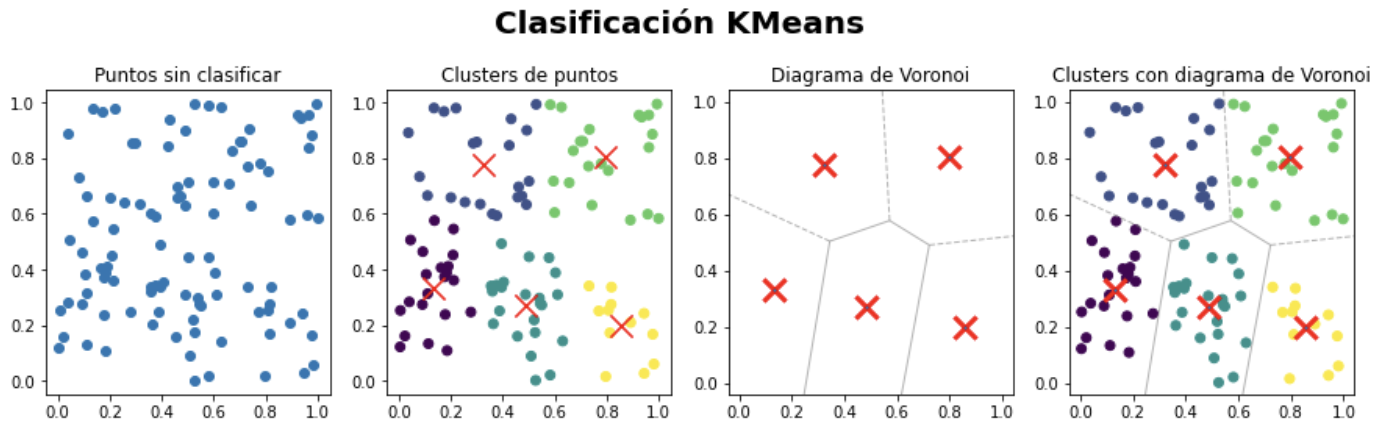

El **método KMeans** es una técnica de aprendizaje automático no supervisado que busca agrupar un conjunto de datos en K clusters, donde K es un número predeterminado de grupos deseados. Utilizando la distancia euclidiana como medida de similitud, KMeans asigna cada punto al cluster más cercano al centroide y ajusta el centroide para minimizar la distancia intra-cluster. El proceso se repite hasta que se alcanza la convergencia y los clusters resultantes se utilizan para analizar patrones y realizar predicciones en diversos campos, como el marketing y la ciencia de datos.

Los **diagramas de Voronoi** son una herramienta de la  **geometría computacional** utilizada para visualizar la división del espacio en regiones definidas por puntos específicos. Cada región está compuesta por todos los puntos que están más cerca de un punto específico que de cualquier otro en el conjunto de puntos. En el contexto del método KMeans, los diagramas de Voronoi se utilizan para visualizar la distribución de los clusters y los puntos asignados a cada uno. En otras palabras, los diagramas de Voronoi muestran la delimitación de los clusters definidos por los centroides en el método KMeans.

**KMeans** y los **diagramas de Voronoi** se pueden utilizar en la segmentación de clientes para agrupar a los clientes en grupos similares y personalizar la publicidad y los servicios. También se utilizan en el análisis de imágenes para agrupar píxeles similares en regiones y segmentar objetos en la imagen.

## Ejemplo mínimo

Importo librerías

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import Voronoi, voronoi_plot_2d

Genero los puntos a clasificar

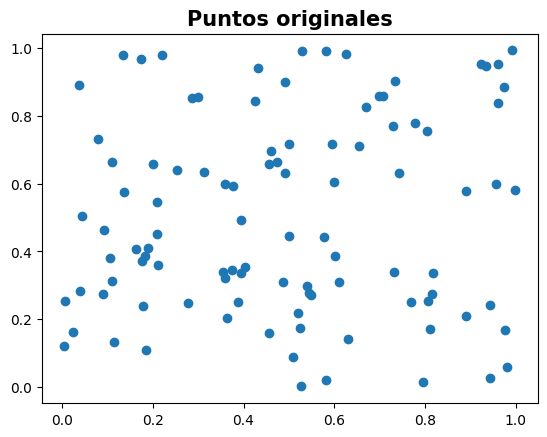

In [ ]:
np.random.seed(100)
X = np.random.rand(100,2)
plt.scatter(X[:,0],X[:,1])
plt.title("Puntos originales", size = 15, weight= "bold")
plt.show()

Implemento el método KMeans para reconocer los clusters en el conjunto de puntos, dando el etiquetado de la clasificación de cada punto y las coordenadas de los centroides de los clusters.

In [ ]:
# Implemento el modelo k-means
n_clusters= 5
kmeans = KMeans(n_clusters = n_clusters,  n_init = 20,  random_state = 0).fit(X)

# Obtener las etiquetas de los clusters para cada punto
labels = kmeans.labels_

# Obtener los centroides de los clusters
centroids = kmeans.cluster_centers_

# Se calcula el diagrama de Voronoi asociado a los centroides
vor = Voronoi(centroids)

# Imprimir los resultados
print("Etiquetas de los clusters: \n", labels)
print("Coordenadas de los centroides: \n", centroids)

Etiquetas de los clusters: 
 [2 1 0 3 0 4 0 1 4 4 1 4 0 0 4 3 0 1 4 3 3 2 0 4 1 3 1 2 0 0 1 2 3 2 2 0 1
 3 4 0 2 1 2 3 1 2 0 1 1 1 3 2 3 3 4 0 3 0 2 1 1 2 2 2 2 0 4 0 3 3 1 2 4 3
 0 0 3 2 2 2 0 1 3 2 3 0 2 3 2 1 3 2 1 1 4 1 3 1 3 0]
Coordenadas de los centroides: 
 [[0.13081481 0.33278494]
 [0.32274469 0.77674351]
 [0.48653358 0.26899107]
 [0.79612937 0.80516802]
 [0.85687872 0.1954738 ]]


In [ ]:
centroids

array([[0.13081481, 0.33278494],
       [0.32274469, 0.77674351],
       [0.48653358, 0.26899107],
       [0.79612937, 0.80516802],
       [0.85687872, 0.1954738 ]])

**Gráficas de los resultados obtenidos**

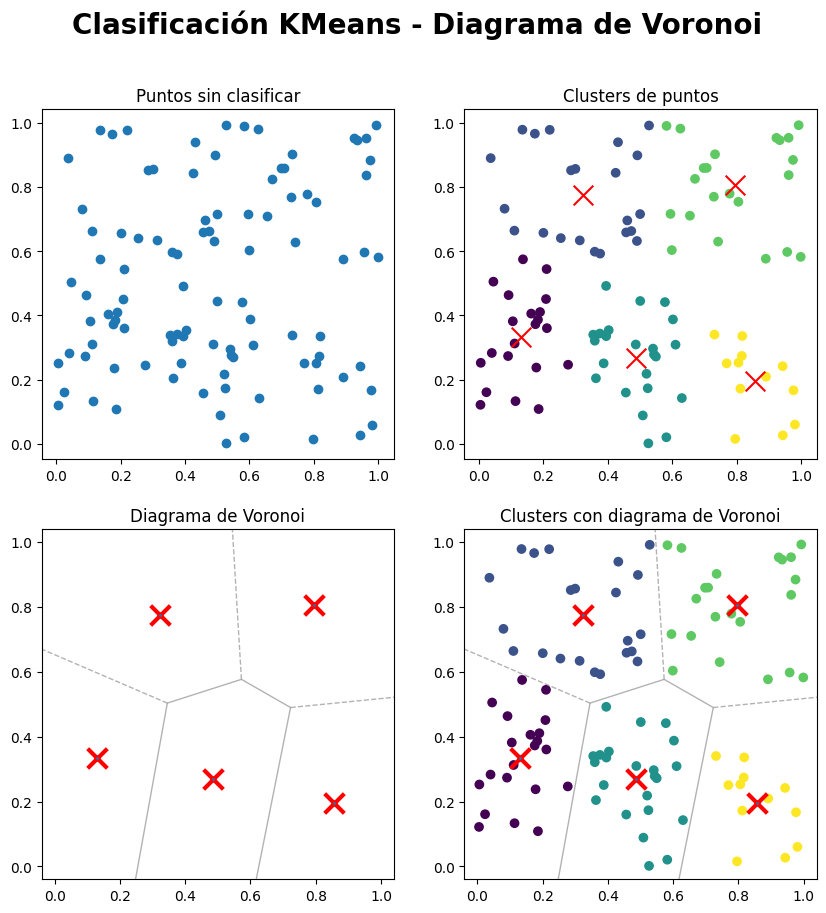

In [ ]:
# Marco de las gráficas
fig, axs = plt.subplots(nrows = 2, ncols =2, figsize = (10,10))
plt.suptitle("Clasificación KMeans - Diagrama de Voronoi", size = 20, weight = "bold")

# Gráfica de puntos iniciales
axs[0,0].scatter(X[:,0], X[:,1])
axs[0,0].set_title("Puntos sin clasificar")

# Gráfica de puntos clasificados en clusters
axs[0,1].scatter(X[:,0], X[:,1], c = labels)

for n in range(n_clusters):
  axs[0,1].scatter(centroids[n,0], centroids[n,1], c = "red",
                 marker = "x", s = 200)
axs[0,1].set_title("Clusters de puntos")


# Gráfica del diagrama de Voronoi de los centroides
fig = voronoi_plot_2d(vor, ax = axs[1,0], show_vertices = False,
                      line_colors='grey', line_width=1, line_alpha=0.6, point_size=2)
axs[1,0].scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='r')
axs[1,0].axis(xmin=-0.04, xmax=1.04, ymin=-0.04, ymax=1.04)
axs[1,0].set_title("Diagrama de Voronoi")

# Gráfica de puntos clasificados en clusters y celdas de Voronoi
fig = voronoi_plot_2d(vor, ax = axs[1,1], show_vertices=False,
                      line_colors='grey', line_width=1, line_alpha=0.6, point_size=2)
axs[1,1].scatter(X[:, 0], X[:, 1], c=labels)
axs[1,1].scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='r')
axs[1,1].axis(xmin=-0.04, xmax=1.04, ymin=-0.04, ymax=1.04)
axs[1,1].set_title("Clusters con diagrama de Voronoi")
plt.show()


## Referencias

* [Documentación: sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

* [Documentación: scipy.spatial.Voronoi](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.Voronoi.html)

* [Documentación: scipy.spatial.voronoi_plot_2d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.voronoi_plot_2d.html)

* [Video: Breve Introducción a los DIAGRAMAS de VORONOI](https://www.youtube.com/watch?v=qjEXwJScXyw)

* [Video: ¿Dónde está la pizzería más cercana?](https://www.youtube.com/watch?v=wCmwBHfiIxQ)